In [27]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

In [28]:
titanic= pd.read_csv("train.csv")

In [29]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
matrix=titanic.corr()

<AxesSubplot:>

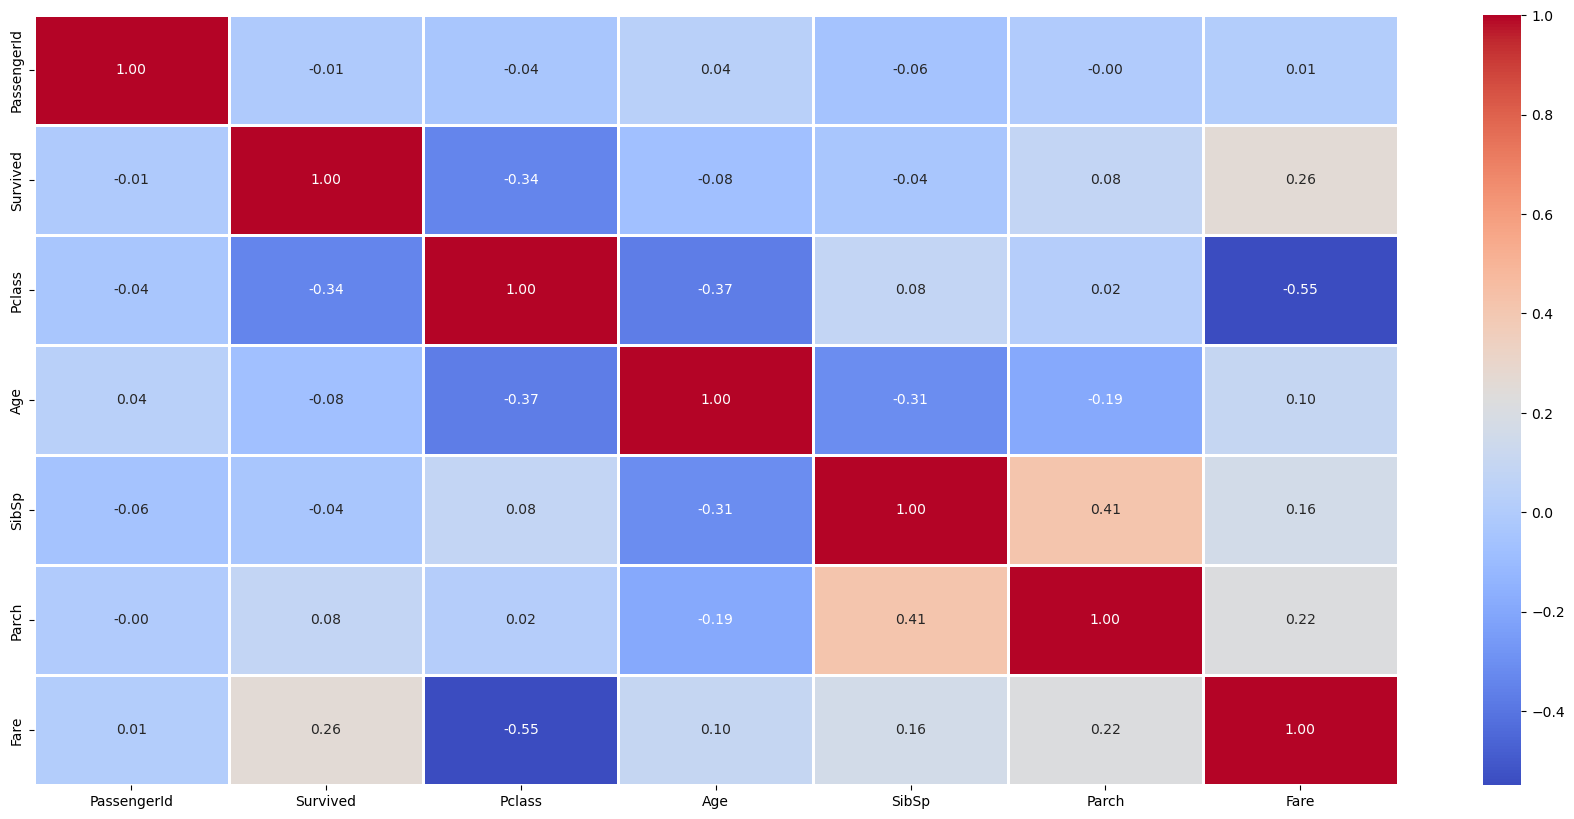

In [42]:
plt.figure(figsize=(22,10))
sns.heatmap(matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.9)

In [34]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


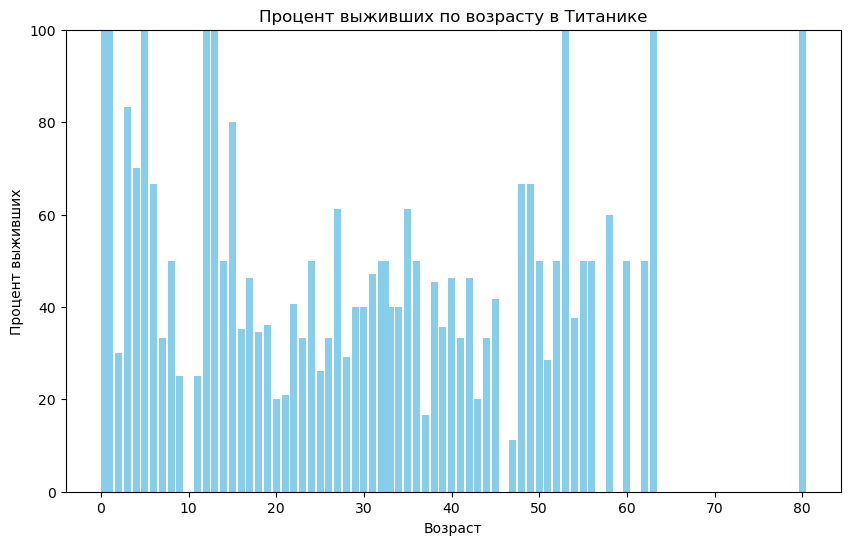

In [50]:
survival_by_age = titanic.groupby('Age')['Survived'].mean() * 100

plt.figure(figsize=(10, 6))
plt.bar(survival_by_age.index, survival_by_age.values, color='skyblue')
plt.title('Процент выживших по возрасту в Титанике')
plt.xlabel('Возраст')
plt.ylabel('Процент выживших')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.ylim(0, 100) 
plt.show()

# Можно сделать вывод , что выживаемость выше среди людей младшего возраста

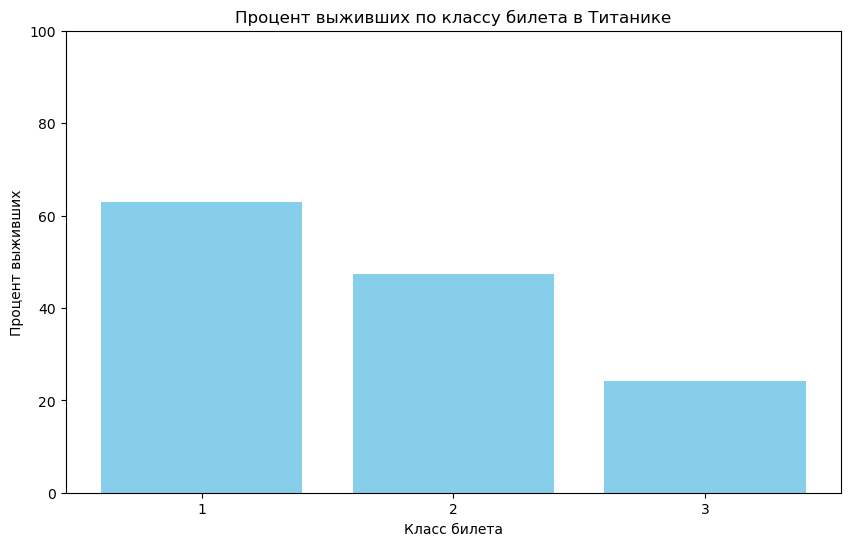

In [48]:
survival_by_pclass = titanic.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(10, 6))
plt.bar(survival_by_pclass.index, survival_by_pclass.values, color='skyblue')
plt.title('Процент выживших по классу билета в Титанике')
plt.xlabel('Класс билета')
plt.ylabel('Процент выживших')
plt.xticks([1, 2, 3])
plt.ylim(0, 100) 
plt.show()


# Тут мы можем видеть, что с наибольшей вероятностью выживали люди из 1 класса

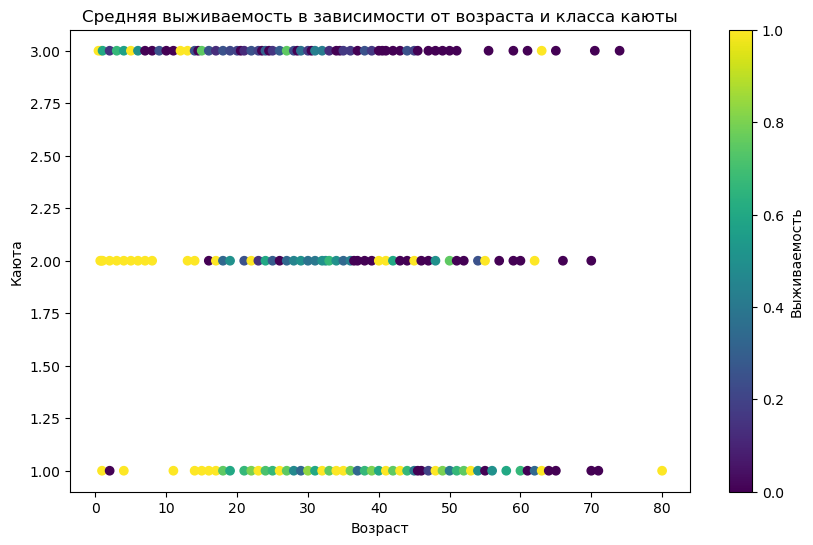

In [58]:
age_pclass = titanic.groupby(['Age', 'Pclass'])['Survived'].mean()
Age,Pclass = zip(*age_pclass.index)
plt.figure(figsize=(10,6))
plt.scatter(Age,Pclass,c=age_pclass.values)
plt.colorbar(label='Выживаемость')
plt.xlabel('Возраст')
plt.ylabel('Каюта')
plt.title('Средняя выживаемость в зависимости от возраста и класса каюты')
plt.show()

In [60]:
sorted_titanic = titanic.sort_values(by='Name')
sorted_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S


In [65]:
titanic['Last_Name'] = titanic['Name'].apply(lambda x: x.split(',')[0])
titanic['Family'] = titanic['Last_Name']
duplicates = titanic['Last_Name'].duplicated(keep=False)
titanic.loc[duplicates, 'Family'] = titanic.loc[duplicates, 'Last_Name']
titanic.drop(columns=['Last_Name'], inplace=True)


In [66]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


In [70]:
survival_by_family = titanic.groupby('Family')['Survived'].mean()
survival_by_family 

Family
Abbing           0.0
Abbott           0.5
Abelson          0.5
Adahl            0.0
Adams            0.0
                ... 
de Mulder        1.0
de Pelsmaeker    0.0
del Carlo        0.0
van Billiard     0.0
van Melkebeke    0.0
Name: Survived, Length: 667, dtype: float64